# Imports

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from random import randint
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from array import *
from scipy import stats
from scipy.stats import randint
from statsmodels.stats.weightstats import ztest

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression


# Load the data

In [3]:
df2= pd.read_csv("C:/Users/keshi/Downloads/Medical/Model.xlsx")

In [4]:
df2.head()

,Unnamed: 0.1,Unnamed: 0,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0,0,37,1,45,0,0,1,2,1,...,1,1,1,1,2,1,0,2,0,31-65
1,1,1,44,0,45,0,0,0,3,5,...,4,0,1,0,0,1,1,0,0,31-65
2,2,2,32,0,7,0,0,0,3,1,...,2,1,1,2,2,2,2,1,0,31-65
3,3,3,31,0,44,0,1,1,2,2,...,2,2,2,1,0,0,0,1,1,31-65
4,4,4,31,0,45,0,0,0,1,3,...,4,1,1,1,2,2,2,0,0,31-65


In [5]:
#drop unnamed columns
df2 = df2.drop('Unnamed: 0.1', axis=1)
df2 = df2.drop('Unnamed: 0', axis=1)

# Metrics

## Chi Sqaure

In [6]:
fam_history = df2['family_history'].value_counts().sort_index()
fam_history

family_history
0    767
1    492
Name: count, dtype: int64

In [7]:
treatment = df2['treatment'].value_counts().sort_index()
treatment

treatment
0    622
1    637
Name: count, dtype: int64

In [8]:
data = [[767, 492], [622, 637]]

In [9]:
stat, p, dof, expected = stats.chi2_contingency(data, correction=False)

In [10]:
stat

33.759463990444985

### Hypothesis

Ho: Reject the null hypothesis that family history and treatment are independent. There is sufficient evidence 
    to suggest that they are not independent.
    
Ha: Fail to reject the null hypothesis that family history and treatment are independent.

In [11]:
p

6.236490588678939e-09

Since the p-value is much smaller than 0.05, we reject the null hypothesis that family history and treatment are 
independent. There is sufficient evidence to suggest that they are not independent.

In [12]:
dof

1

In [13]:
expected

array([[694.5, 564.5],
       [694.5, 564.5]])

The very high test statistic and extremely low p-value indicate strong evidence against the null hypothesis. 
Therefore, we reject the null hypothesis and conclude that family history and treatment are not independent

#### perform a Chi-Squared Test of independence on all features in a DataFrame to determine which ones are statistically significant:

In [15]:
#seperate target column (treatment) from features column
# Separate the 'treatment' column from the DataFrame
chi_treatment = df2['treatment']

# Drop the 'treatment' column from the DataFrame
chi_df = df2.drop(columns='treatment')

# Check the type of chi_treatment
type_of_chi_treatment = type(chi_treatment)
type_of_chi_treatment

pandas.core.series.Series

In [16]:
for column in df2:
    crosstab = pd.crosstab(df2[column], df2['treatment'])
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    if p < .05:
        print('p value for', column, ':', p)

p value for Gender : 1.2926175878204295e-12
p value for Country : 0.01705720173000851
p value for family_history : 1.1584182294491328e-40
p value for treatment : 6.790757177941158e-275
p value for work_interfere : 1.944084172920949e-127
p value for benefits : 8.326816588490713e-15
p value for care_options : 2.6509645800176187e-21
p value for wellness_program : 0.003186522932181415
p value for seek_help : 0.004223416520618908
p value for anonymity : 1.8304549906790162e-06
p value for leave : 5.025795235445741e-06
p value for mental_health_consequence : 1.4180505235573011e-05
p value for coworkers : 0.04975472196415934
p value for mental_health_interview : 0.0017553628170834984
p value for mental_vs_physical : 0.00016181406137210283
p value for obs_consequence : 4.020553287446151e-08


Each of these features has a p-value less than 0.05, indicating that their association with the 'treatment' variable 
is statistically significant.

#### Perfrom a two sample Z test on family history vs treatment and gender vs treatment

#### Family History vs. Treatment


Null Hypothesis: The proportion of individuals with a family history of mental illness seeking treatment is the same
    as those without a family history seeking treatment.
    
    
Alternate Hypothesis: The proportion of individuals with a family history of mental illness seeking treatment 
    is different from those without a family history seeking treatment.

#### Gender vs. Treatment


Null Hypothesis: The proportion of males seeking treatment is the same as the proportion of females seeking treatment.
    
    
Alternate Hypothesis: The proportion of males seeking treatment is different from the proportion of females seeking 
    treatment.

In [17]:
# The dataset split into two groups based on family history: one group consisted of individuals who had a family history,
# with corresponding values for treatment, while the other group consisted of individuals who did not have a family 
# history, also with corresponding values for treatment.
fam_history1 = df2[df2.family_history==1].treatment
fam_history0 = df2[df2.family_history==0].treatment
tstat, p = ztest(fam_history1, fam_history0)
print("P value for family history for a two sample Z test or proportion is :", p)

#The gender divided into males corresponding to treatment values and females corresponding to treatment values.
male_ztest0 = df2[df2.Gender==0].treatment
female_ztest1 = df2[df2.Gender==1].treatment
tstat_gender, p_gender = ztest(male_ztest0, female_ztest1)
print("P value for Gender for a two sample Z test or proportion is :", p_gender)


P value for family history for a two sample Z test or proportion is : 1.820343805112358e-47
P value for Gender for a two sample Z test or proportion is : 2.6794412434712703e-13


both p-values indicate that there are significant differences in treatment outcomes based on family history and gender.
These results imply that family history and gender are important factors that influence treatment outcomes in the 
studied population.

### Train/Test Split

In [18]:
y = df2['treatment']
X = df2.drop(['treatment', 'Age', 'age_range'], axis=1)

In [19]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=21)

## Random Forest Model

### Define the pipeline

In [20]:
#Define a pipeline
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

### Hyperparameter search using GridSearchCV

In [21]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [22]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [23]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler(), None]})

In [24]:
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 483,
 'simpleimputer__strategy': 'mean',
 'standardscaler': None}

In [25]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.39736302, 0.39562853, 0.48206092, 0.49101719, 0.44392067])

In [26]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.4419980658175929, 0.04038322563131575)

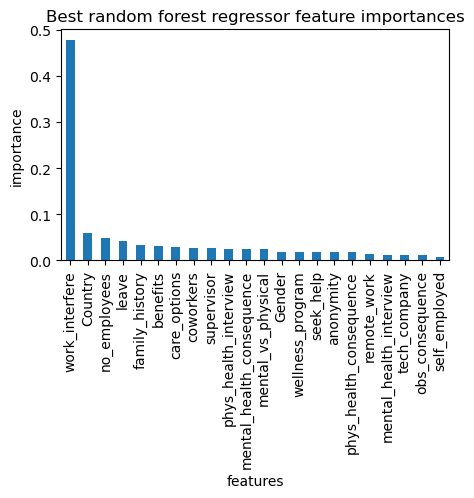

In [31]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(5, 3))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

the dominant top four features are:

work_interfere, Country, no_employees and leave

## Linear Regression Model

### Create Pipeline

In [28]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

### Fit the pipeline

In [79]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x000001FD1C5B0C20>)),
                ('linearregression', LinearRegression())])

### Assess performance on the train and test set

In [80]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [82]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.4412790009383384, 0.4743452604592502)

In [83]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.2908859557235006, 0.27885180484260524)

based on MAE values alone, the model appears to perform well on both the training and test sets, with predictions that 
are reasonably close to the actual values of the target variable.

In [85]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [86]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [87]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000001FD1C5B0C20>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22]})

In [88]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [89]:
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 10}

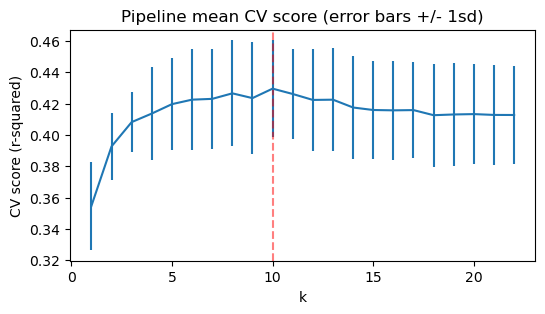

In [92]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(6, 3))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [93]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [95]:
#Get the linear model coefficients 
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

work_interfere             0.249138
family_history             0.089968
Gender                     0.056204
coworkers                  0.043375
benefits                   0.033817
obs_consequence            0.032412
care_options               0.030189
mental_health_interview    0.020323
anonymity                  0.016123
wellness_program          -0.011844
dtype: float64

These results suggest that work_interfere and family history are biggest positive feature. 

## Final Model Selection

### Linear regression model performance

In [97]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [99]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(0.2936166158528676, 0.009202022288754384)

In [100]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

0.27885180484260524

### Random forest regression model performance

In [101]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [102]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(0.26967265825961484, 0.01068318485840318)

In [103]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

0.2395576588123172

Random Forest (RF) appears to be performing better overall based on both cross-validation results and test set 
performance. It shows lower mean MAE and standard deviation in cross-validation, indicating better predictive 
accuracy across different folds or subsets of the data. Additionally, RF also demonstrates a lower MAE on the test set,
suggesting better generalization to new, unseen data compared to Linear Regression.